# Table of Contents
### 1. Import Librairies
### 2. Import Data
### 3. Data Preparation for Regression Analysis
### 4. Regression analysis

# 1. Import Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

# 2. Import Data

In [3]:
#Create path
path = r'C:\Users\manev\Documents\Agentür für Arbeit\CareerFoundry\Data Immersion\Achievement 6\Film_Industry'

In [4]:
#Create data frame for the "movie_data_cleaned_35yr" data set
movie_data= pd.read_pickle(os.path.join(path,'Data','Prepared Data','movie_data_final.pkl'))

In [5]:
#Check the shape of the movie_data data set
movie_data.shape

(7000, 13)

In [6]:
movie_data.head()

,movie_name,MPAA_rating,genre,release_year,grade,nb_of_votes,director,writer,main_star,production_country,gross_revenue,production_company,runtime
641,Weird Science,PG-13,Comedy,1985,6.6,83000,John Hughes,John Hughes,Anthony Michael Hall,United States of America,38934048.0,Universal Pictures,94
642,The Goonies,PG,Adventure,1985,7.8,252000,Richard Donner,Chris Columbus,Sean Astin,United States of America,63980721.0,Warner Bros.,114
643,Back to the Future,PG,Adventure,1985,8.5,1100000,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,United States of America,381906762.0,Universal Pictures,116
644,To Live and Die in L.A.,R,Action,1985,7.3,31000,William Friedkin,Gerald Petievich,William Petersen,United States of America,17307019.0,SLM Production Group,116
645,Clue,PG,Comedy,1985,7.3,88000,Jonathan Lynn,John Landis,Eileen Brennan,United States of America,14643997.0,Paramount Pictures,94


# 3. Data Preparation for Regression Analysis

Text(0, 0.5, 'Number of Votes')

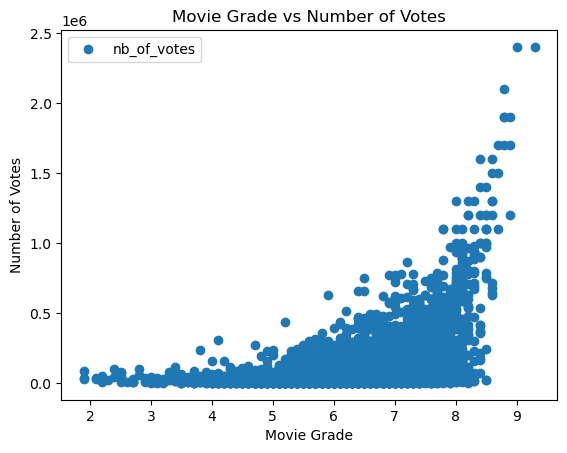

In [8]:
#Create a scatterplot
movie_data.plot(x = 'grade', y='nb_of_votes',style='o')
plt.title('Movie Grade vs Number of Votes')  
plt.xlabel('Movie Grade')  
plt.ylabel('Number of Votes')  

#### Hypothesis: The higher the grade, the higher the number of votes.

In [9]:
#Reshape the variables into NumPy arrays and put them into separate objects.
X = movie_data['grade'].values.reshape(-1,1)
y = movie_data['nb_of_votes'].values.reshape(-1,1)

In [11]:
#Check the arrays were created
X

array([[6.6],
       [7.8],
       [8.5],
       ...,
       [3. ],
       [4.8],
       [6.8]])

In [12]:
#Check the arrays were created
y

array([[  83000],
       [ 252000],
       [1100000],
       ...,
       [    122],
       [    373],
       [    869]], dtype=int64)

In [13]:
#Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Perform Regression Analysis

In [15]:
#Create a regession object
regression = LinearRegression()

In [16]:
#Fit the regession to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
#Predict the values of y using X in the test set
y_predicted = regression.predict(X_test)

Text(0, 0.5, 'Number of Votes')

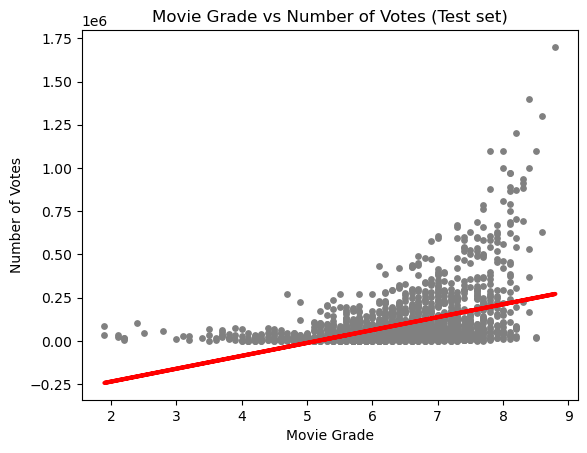

In [18]:
#Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Movie Grade vs Number of Votes (Test set)')
plot_test.xlabel('Movie Grade')
plot_test.ylabel('Number of Votes')

#### The line doesn't seem to fit the data well. It looks like linear regression might not be a good fit for this data.

In [19]:
#Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) #This is the mean squared error
r2 = r2_score(y_test, y_predicted) #This is the R2 score. 

In [24]:
#Check the values for the slope, root mean squared error, and r-squared value.
print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[74560.7]]
Mean squared error:  19172734130.3534
R2 score:  0.16385821664391265


The mean squarred error is very high (19172734130.3534) and the R2 score is very low (0,16), so it looks like this model is not performing well.

In [25]:
#Create a data frame showing the predicted y values and the real y values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,54000,33405.554740
1,23000,-3874.797367
2,95000,33405.554740
3,56000,137790.540640
4,4700,-3874.797367
5,16000,137790.540640
6,28000,93054.118112
7,171000,63229.836426
8,168000,78141.977269
9,7800,3581.273054


The model did not perform well on the test set. This is not suprising as the scatter plot was showing a positive relationship between the two variables, but not a linear one. Linear regression is therefore not the right tool to use to predict the number of votes per movie, based on the movie's grade.
Outliers could have skewed the data, although we have made the choice to keep these values in the data set as they are significant.